# 2주차 실습 및 활동

In [1]:
import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
assert sys.version_info >= (3, 5)

In [2]:
# OECD의 삶의 만족도(life satisfaction) 데이터와 IMF의 1인당 GDP(GDP per capita) 데이터를 합치는 함수
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

책에 있는 코드는 데이터 파일이 현재 디렉토리에 있다고 가정합니다. 여기에서는 `datasets/lifesat` 안에서 파일을 읽어 들입니다.

In [3]:
import os
os.getcwd()

'/content'

In [4]:
datapath = os.path.join("datasets", "lifesat", "")
datapath

'datasets/lifesat/'

In [5]:
# 데이터 다운로드
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [6]:
# 데이터 적재
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [7]:
# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita) # 함수로 데이터 합침

In [8]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [9]:
# feature data와 target 데이터
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print(X.shape)
print(y.shape)

(29, 1)
(29, 1)


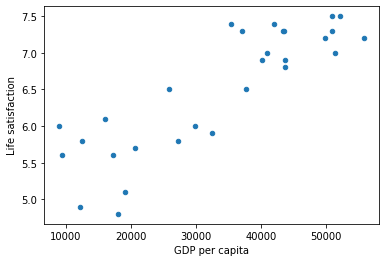

In [10]:
# 데이터프레임에는 plot 함수를 직접 호출 가능
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [11]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression() # 선형회귀 모델 객체 생성
model

LinearRegression()

In [12]:
model.fit(X, y)

LinearRegression()

In [13]:
# coef_ : 모델에 학습된 파라미터를 확인 가능
a = model.coef_
print(f'학습된 파라미터: {a}')

# intercept_ : 모델에 학습된 y절편(bias) 확인 가능
b = model.intercept_
print(f'학습된 y절편: {b}')

# 새로운 데이터 X_new=[[22587]]의 예측값은 다음과 같은 선형식으로 나타낼 수 있음
22587*a + b

학습된 파라미터: [[4.91154459e-05]]
학습된 y절편: [4.8530528]


array([[5.96242338]])

In [14]:
# 키프로스에 대한 예측
X_new = [[22587]]  # 키프로스 1인당 GDP
pred = model.predict(X_new) # X_new값을 넣어서 예측
print(pred) # 출력 [[ 5.96242338]]. 위 선형식에서의 y값과 동일

[[5.96242338]]


이전 코드에서 선형 회귀 모델을 k-최근접 이웃 회귀(이 경우 k=3)로 바꾸려면 간단하게 다음 두 라인만 바꾸면 됩니다:

```python
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
```

아래와 같이 바꿉니다:

```python
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
```

In [15]:
# 3-최근접 이웃 회귀 모델로 바꿉니다.
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# 모델을 훈련합니다.
model1.fit(X,y)

# 키프로스에 대한 예측을 만듭니다.
print(model1.predict(X_new)) # 출력 [[5.76666667]]

[[5.76666667]]


### 추가 활동

* 1인당 GDP, 삶의 만족도 데이터를 통해 얻은 선형회귀 모델을 (직선)을 점들과 함께 그리기

In [24]:
def plot_predictions(model, X, y):

  # 구간 내에균일한 간격으로 숫자를 채워줌
  GDP = np.linspace(X.min(), X.max(), 100) # predict할 때 사용할 X_test를 의미
  life = model.coef_ * GDP + model.intercept_ # 새로운 X값(GDP)를 학습한 모델의 선형식에 넣어 life 예측값 저장

  GDP_range = [GDP.min(), GDP.max()]
  life_range = [life.min(), life.max()]

  plt.figure(figsize=(12, 9))
  plt.scatter(X, y, marker='x', color='r') # 실제 y
  plt.plot(GDP_range, life_range, color='orange', linewidth=4, alpha=0.5) # 학습한 y

  plt.title(model, fontsize=18)
  plt.legend(['Regression Line', 'actual'], fontsize=12)
  plt.xlabel('GDP per capita', fontsize=15)
  plt.ylabel('Life satisfaction', fontsize=15)
  plt.grid()
  plt.show()

In [25]:
model.fit(X, y)

LinearRegression()

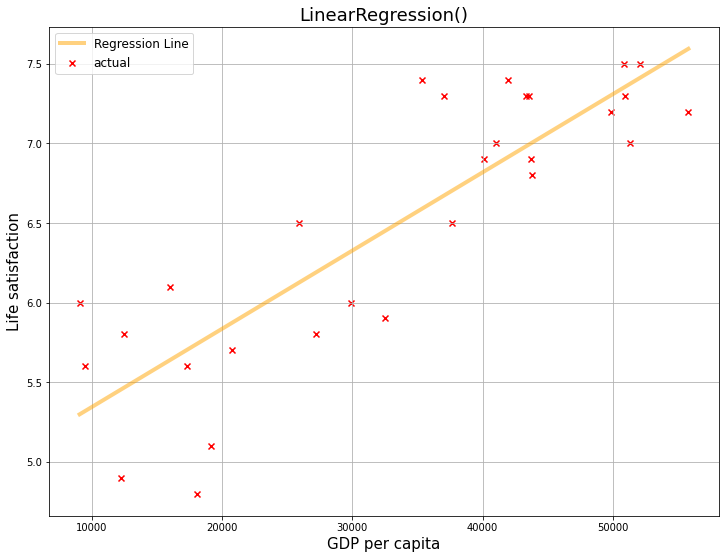

In [26]:
plot_predictions(model, X, y)